In [1]:
#Importing the needed modules
import numpy as np
from numpy import array
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Following ensure that graph is on the same page
%matplotlib inline

## Collect historical monthly closing prices using Yahoo Finance for GOOG, AMZN, and SPY from September 1st, 2018, to September 1st, 2023.


In [2]:
# Define the stock symbols and date range
symbols = ['GOOG', 'AMZN', 'SPY']
start_date = '2018-09-01'
end_date = '2023-09-01'

# Download historical data
data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')

# Extract the adjusted closing prices
closing_prices=data[[('AMZN','Adj Close'),('GOOG','Adj Close'),('SPY','Adj Close')]]

# Resample the data to get monthly closing prices
monthly_closing_prices = closing_prices.resample('M').ffill()
monthly_closing_prices.head()

[*********************100%***********************]  3 of 3 completed


,AMZN,GOOG,SPY
,Adj Close,Adj Close,Adj Close
Date,,,
2018-09-30,100.150002,59.673500,266.362213
2018-10-31,79.900497,53.838501,247.955536
2018-11-30,84.508499,54.721500,252.554916
2018-12-31,75.098503,51.780499,230.317856
2019-01-31,85.936501,55.818501,248.758347


## Calculate monthly returns for each stock.


In [3]:
# Calculate monthly returns
returns = pd.DataFrame()
returns['GOOG'] = monthly_closing_prices['GOOG'].pct_change().dropna()
returns['AMZN'] = monthly_closing_prices['AMZN'].pct_change().dropna()
returns['SPY'] = monthly_closing_prices['SPY'].pct_change().dropna()
returns.head()

,GOOG,AMZN,SPY
Date,,,
2018-10-31,-0.097782,-0.202192,-0.069104
2018-11-30,0.016401,0.057672,0.018549
2018-12-31,-0.053745,-0.111350,-0.088048
2019-01-31,0.077983,0.144317,0.080065
2019-02-28,0.003180,-0.045906,0.032416


## Perform linear regression to determine the α (alpha) and β (beta) coefficients for each stock based on monthly returns.

Alpha and Beta for GOOG:
Alpha (α): 0.006339843617345166
Beta (β): 1.0688442033185686


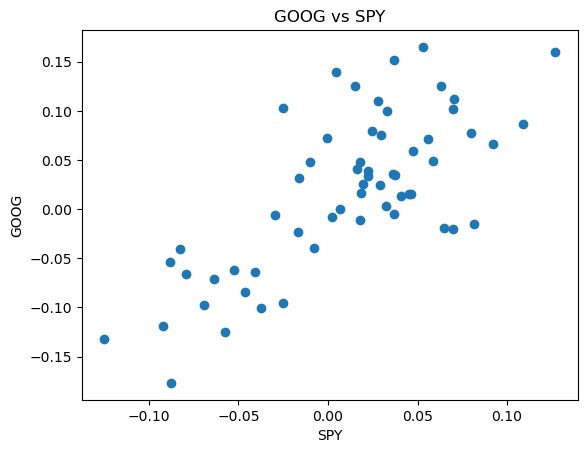


Alpha and Beta for AMZN:
Alpha (α): -0.002385295381030096
Beta (β): 1.2346763668907625


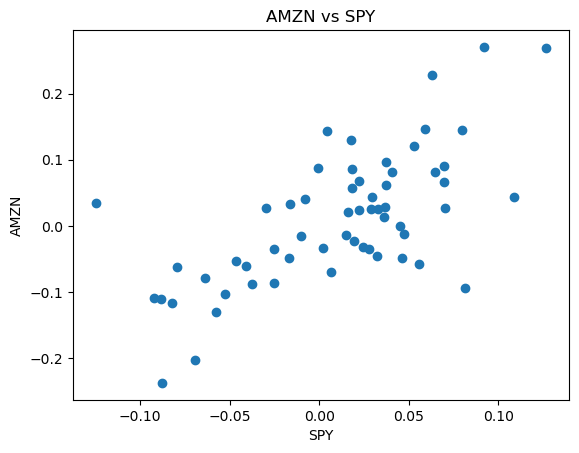

In [4]:
#Extracting Amazon and S&P 500 data
x = returns.SPY
y = returns.GOOG
z = returns.AMZN

#Perform linear regression for GOOG
model1 = np.polyfit(x, y, 1)

# Perform linear regression for AMZN
model2 = np.polyfit(x, z, 1)

# Print alpha and beta for GOOG
print("Alpha and Beta for GOOG:")
print("Alpha (α):", model1[1])
print("Beta (β):", model1[0])
#Scatter plot of data
plt.scatter(returns.SPY,returns.GOOG)
plt.xlabel("SPY")
plt.ylabel("GOOG")
plt.title('GOOG vs SPY')
plt.show()


# Print alpha and beta for AMZN
print("\nAlpha and Beta for AMZN:")
print("Alpha (α):", model2[1])
print("Beta (β):", model2[0])
#Scatter plot of data
plt.scatter(returns.SPY,returns.AMZN)
plt.xlabel("SPY")
plt.ylabel("AMZN")
plt.title('AMZN vs SPY')
plt.show()







## Implement machine learning techniques to determine α and β using different learning rates and numbers of epochs.

Intercept= -0.001889335230374546 Slope= 1.1909630881339293 error = 0.005431352012318745


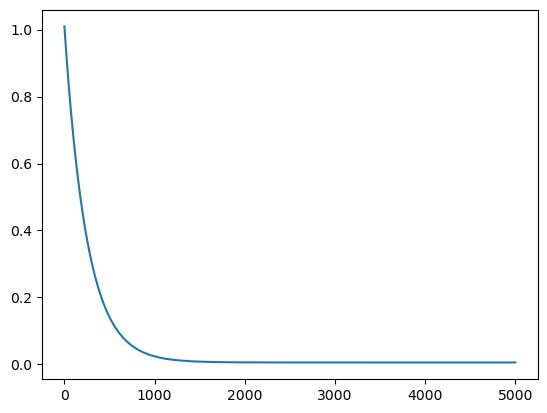

In [5]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.001 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)


In [25]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.001 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
error=np.sum(np.square(y-b0 - b1*x))/m

db0 = -2*(np.sum(y- b0 - b1*x))/m
db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
print(db0,db1,error)

2.0040571984183013 0.020411257893784993 1.009490583427958


Intercept= -0.002038799600322385 Slope= 1.2010902440431375 error = 0.005429057537157636


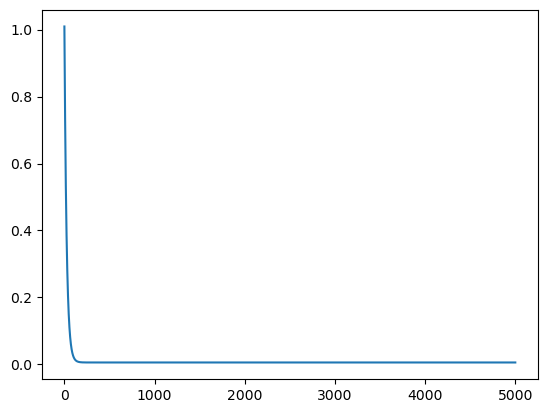

In [15]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.01 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= -0.0023852914884895755 Slope= 1.2346763468001043 error = 0.005425753670481344


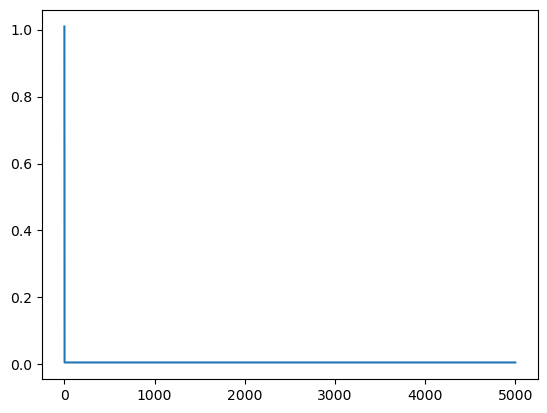

In [16]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.5 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.13337156619197302 Slope= 1.191322279356245 error = 0.0238137617439785


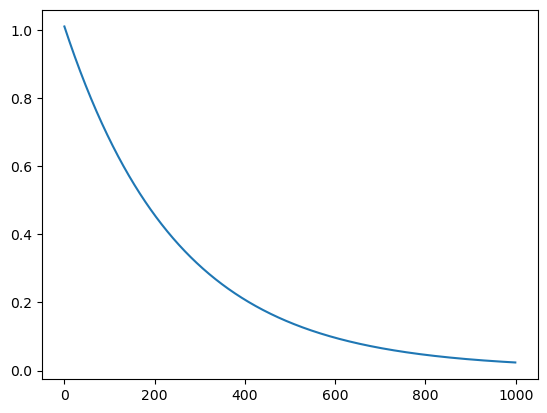

In [17]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 1000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.001 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= -0.0019473309083607206 Slope= 1.1922241768254342 error = 0.005431032078692784


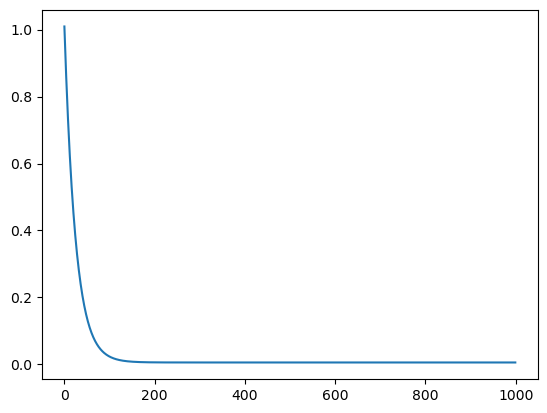

In [18]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 1000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.01 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= -0.002360558084321433 Slope= 1.232278891961219 error = 0.005425770602429985


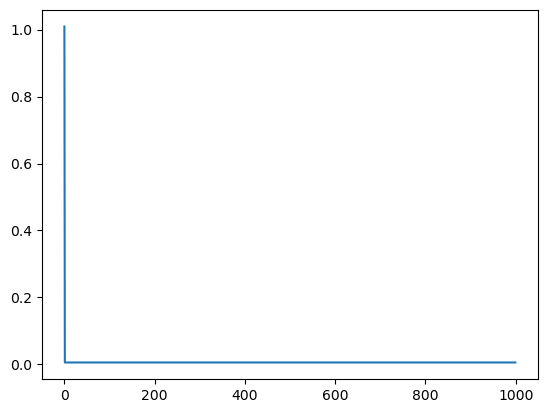

In [19]:
#Running Regression using Machine Learning Techniques

#Extracting Amazon and S&P 500 data
y = returns.AMZN
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 1000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.5 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.0051733254995239624 Slope= 1.186247802437093 error = 0.0028936020253519956


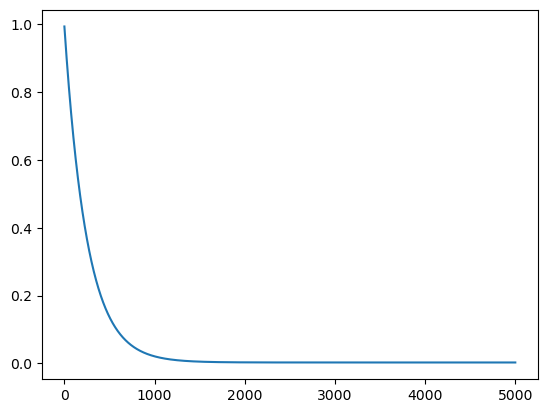

In [20]:
#Running Regression using Machine Learning Techniques

#Extracting Google and S&P 500 data
y = returns.GOOG
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.001 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.005409263439563496 Slope= 1.1590473794689369 error = 0.002877065216695222


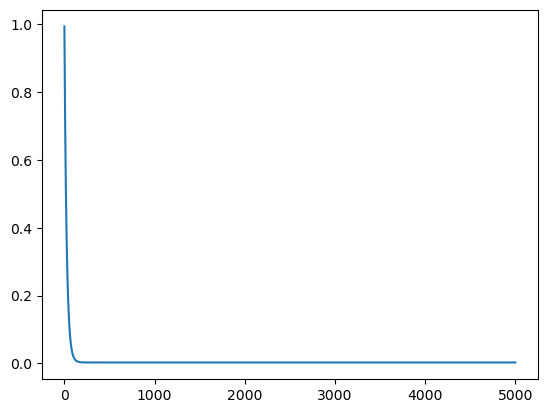

In [21]:
#Running Regression using Machine Learning Techniques

#Extracting Google and S&P 500 data
y = returns.GOOG
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.01 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.0063398442647001705 Slope= 1.068844450384427 error = 0.0028532340903418916


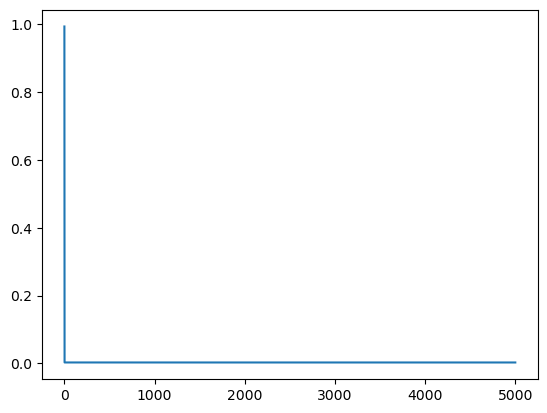

In [22]:
#Running Regression using Machine Learning Techniques

#Extracting Google and S&P 500 data
y = returns.GOOG
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 5000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.5 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.13944805644973254 Slope= 1.1904160880679704 error = 0.02102122552944066


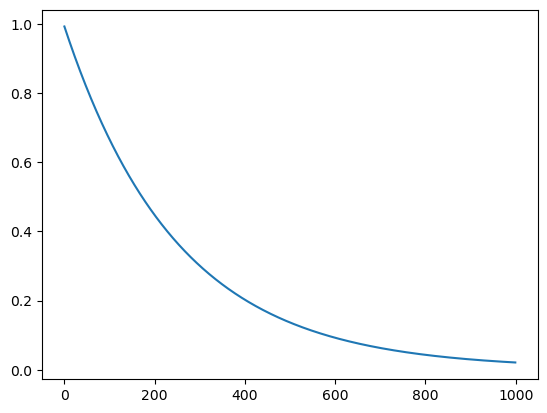

In [23]:
#Running Regression using Machine Learning Techniques

#Extracting Google and S&P 500 data
y = returns.GOOG
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 1000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.001 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.005163610167189947 Slope= 1.182859169733159 error = 0.0028913077856074537


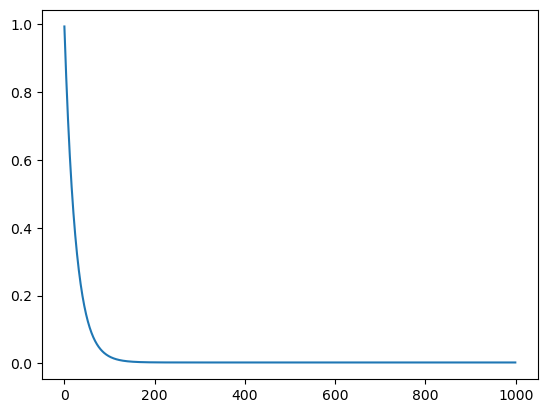

In [24]:
#Running Regression using Machine Learning Techniques

#Extracting Google and S&P 500 data
y = returns.GOOG
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 1000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.01 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)

Intercept= 0.00627341722139774 Slope= 1.0752833471620638 error = 0.0028533562222094896


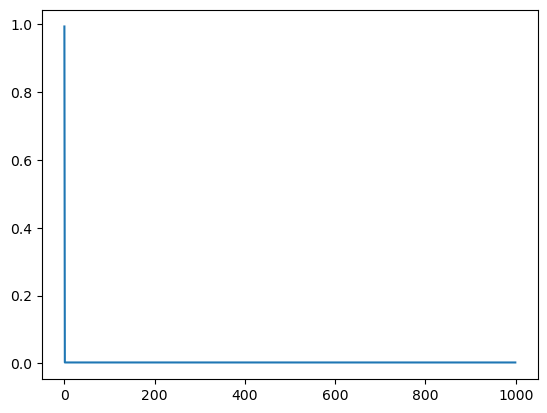

In [25]:
#Running Regression using Machine Learning Techniques

#Extracting Google and S&P 500 data
y = returns.GOOG
x = returns.SPY

#Using machine learning to converge on the regression model

# determining the number of runs called epochs
epochs = 1000 
#Learning rate, the amount at each step the parameters are adjusted
lr = 0.5 
#Number of data points for each feature  
m = len(x)
#Starting numbers for intercept and slope
b0 = 1
b1 = 1.2
#Keeping track how error declines 
error_list =[]
#Defininf a function do to the itterations
def gradient(b0,b1):
 # Finding the gradients 
    db0 = -2*(np.sum(y- b0 - b1*x))/m
    db1 = -2*(np.dot(x ,(y- b0 - b1*x)))/m
  #updating slope and interface
    b0 -= db0 * lr
    b1 -= db1*lr 
    return b0, b1

#Running the model
for i in range(epochs):
    error = np.sum(np.square(y-b0 - b1*x))/m
    error_list.append(error)
    b0 , b1 = gradient(b0,b1)

print("Intercept=", b0, "Slope=", b1, "error =", error)
#Ploting the error to see how it declines
plt.plot(error_list)